![clothing_classification](clothing_classification.png)


Fashion Forward is a new AI-based e-commerce clothing retailer.
They want to use image classification to automatically categorize new product listings, making it easier for customers to find what they're looking for. It will also assist in inventory management by quickly sorting items.

As a data scientist tasked with implementing a garment classifier, your primary objective is to develop a machine learning model capable of accurately categorizing images of clothing items into distinct garment types such as shirts, trousers, shoes, etc.

In [21]:
# Run the cells below first

In [22]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchmetrics import Accuracy, Precision, Recall
import matplotlib.pyplot as plt

In [23]:
# Load datasets
from torchvision import datasets
import torchvision.transforms as transforms

train_data = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

In [24]:
train_dataloader = DataLoader(train_data, batch_size= 32, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size= 32, shuffle = False)

In [25]:
images, labels = next(iter(train_dataloader))

print(images.shape)

torch.Size([32, 1, 28, 28])


In [26]:
class clothing_classifier_model(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 20, 3)
        self.relu = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(2, 2)

        self.linear1 = nn.Linear(20 * 13 * 13, 256)
        self.linear2 = nn.Linear(256, 128)
        self.linear3 = nn.Linear(128, 10)
        

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.maxpool1(x)
        x = x.view(x.size(0), -1)

        x = self.linear1(x)
        x= self.relu(x)
        x = self.linear2(x)
        x= self.relu(x)
        x = self.linear3(x)  
        return x

model = clothing_classifier_model()

In [27]:
loss = nn.CrossEntropyLoss()

optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [12]:
epochs = 5
los_training_epochs = []
los_testing_epochs = []
accuracy_metric = Accuracy(task="multiclass", num_classes=10)
precision_metric = Precision(task="multiclass", num_classes=10, average = None)
recall_metric = Recall(task="multiclass", num_classes=10, average = None)

accuracy_list = []
precision_list = []
recall_list = []

for epoch in range(epochs):
    los_training_epoch = 0
    los_testing_epoch = 0
    model.train()
    for data in train_dataloader:
    
        x_data , target = data
    
        optimizer.zero_grad()
    
        predictions = model(x_data)
    
        loss_training = loss(predictions, target)
    
        loss_training.backward()
        
        optimizer.step()
    
        los_training_epoch += loss_training


    los_training_epochs.append(los_training_epoch / len(train_dataloader))
    
    model.eval()

    accuracy_metric.reset()
    precision_metric.reset()
    recall_metric.reset()

    
    with torch.no_grad():
        for data in test_dataloader:   
            x_data , target = data
    
            predictions = model(x_data)

            predicted_label = predictions.argmax(dim = 1)

            accuracy_metric.update(predicted_label, target)
            precision_metric.update(predicted_label, target)
            recall_metric.update(predicted_label, target)
        
            loss_testing = loss(predictions, target)
     
            los_testing_epoch += loss_testing

    accuracy_list.append(accuracy_metric.compute())
    precision_list.append(precision_metric.compute())
    recall_list.append(recall_metric.compute())
    
    los_testing_epochs.append(los_testing_epoch / len(test_dataloader))

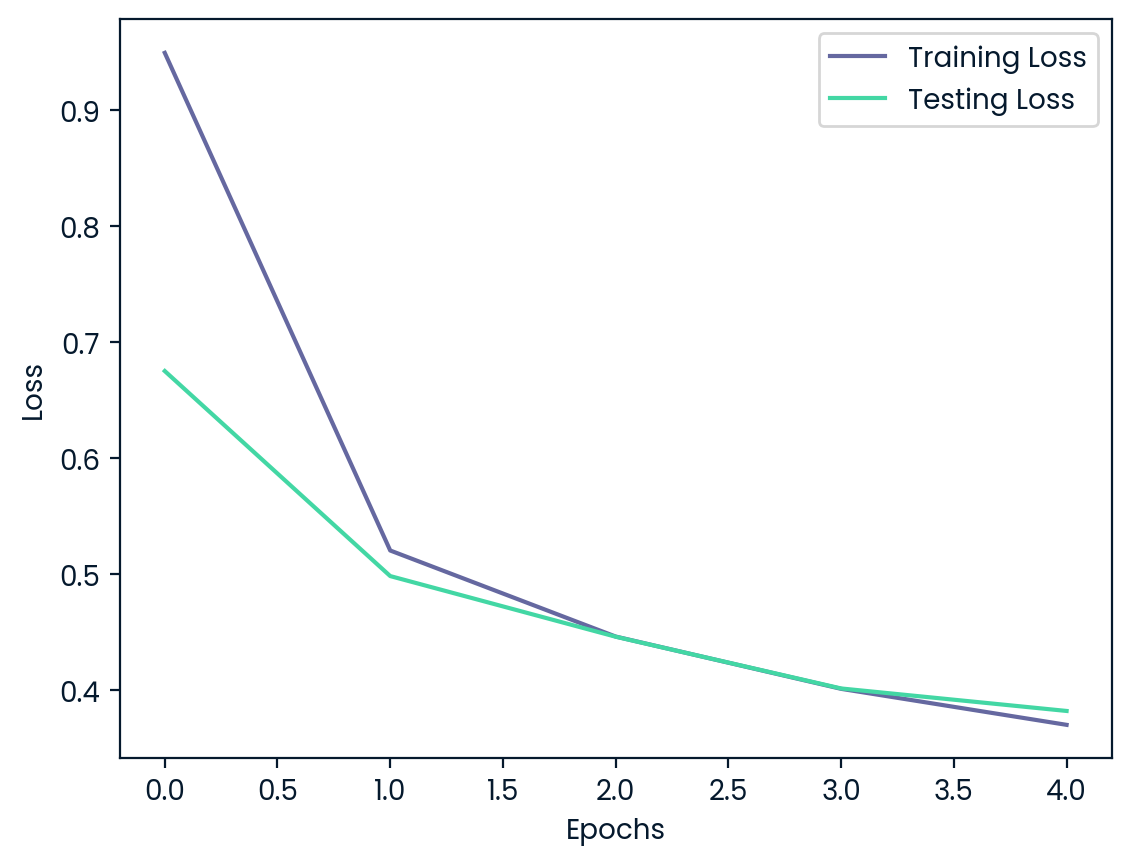

In [14]:
plt.plot(range(epochs), [t.item() for t in los_training_epochs], label = "Training Loss")
plt.plot(range(epochs), [t.item() for t in los_testing_epochs], label = "Testing Loss")

plt.xlabel("Epochs")
plt.ylabel("Loss")

plt.legend()
plt.show()

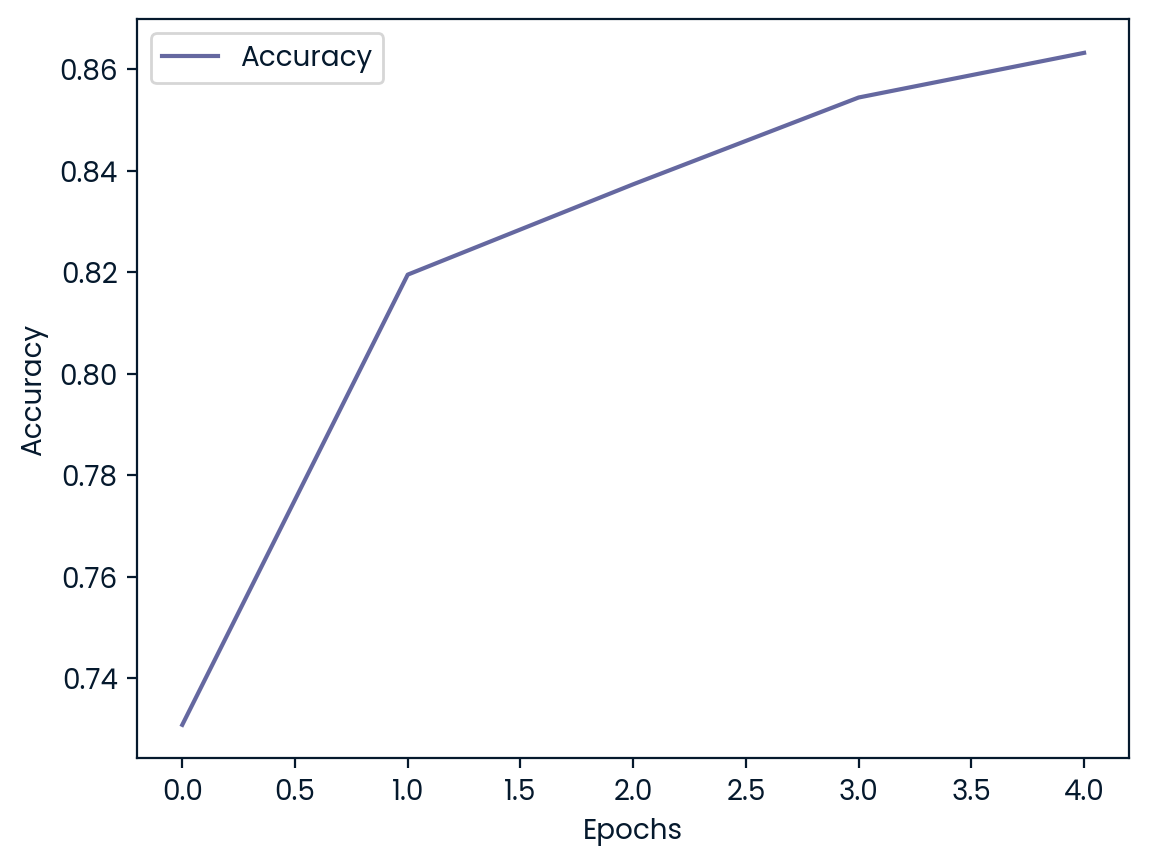

In [15]:
plt.plot(range(epochs), accuracy_list, label = "Accuracy")


plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [17]:
predictions = []

model.eval()
accuracy_metric.reset()
precision_metric.reset()
recall_metric.reset()

with torch.no_grad():
    for x_data, target in test_dataloader:

        outputs = model(x_data)
        predicted_labels = outputs.argmax(dim=1)

        accuracy_metric.update(predicted_labels, target)
        precision_metric.update(predicted_labels, target)
        recall_metric.update(predicted_labels, target)

        predictions.extend(predicted_labels.tolist())


In [20]:
accuracy = accuracy_metric.compute().item()
precision = precision_metric.compute().tolist()
recall = recall_metric.compute().tolist()

0.8632000088691711